In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

# One-hot encode the 'type' column in the feature matrix X
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Drop non-numeric columns 'nameOrig' and 'nameDest'
data = data.drop(columns=['nameOrig', 'nameDest'])

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Drop rows with missing values from both X and y
X = X.dropna()
y = y.dropna()

# Impute missing values with the median for X
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training, validation, and test sets
# training
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation on the validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('accuracy :',accuracy)
precision = precision_score(y_val, y_pred)
print('precision :', precision)
recall = recall_score(y_val, y_pred)
print('Recall :', recall)
f1 = f1_score(y_val, y_pred)
print('F1 Score :', f1)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])


## Data respresentation through  thorugh different techniques
# Create and display the Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create and display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Create and display the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, model.predict_proba(X_val)[:, 1])
avg_precision = average_precision_score(y_val, model.predict_proba(X_val)[:, 1])

plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.show()




# **Using knn**

Accuracy: 1.00


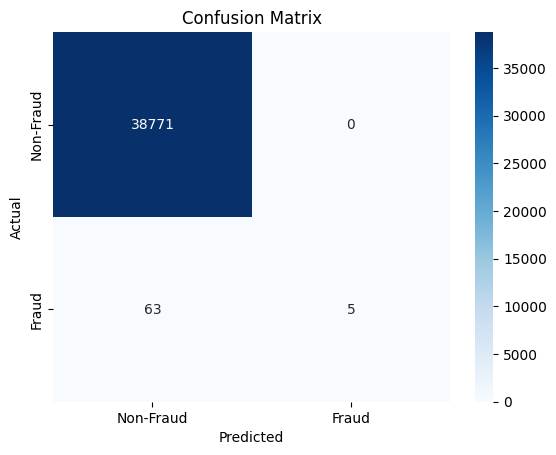

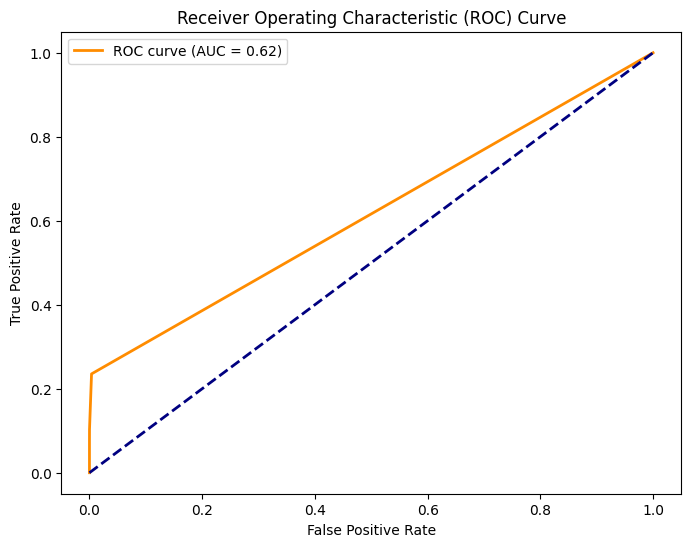

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
dataset = pd.read_csv("/content/creditcard.csv")

# Drop rows with missing values for simplicity
dataset = dataset.dropna()

# Split the data into features (X) and target variable (y)
X = dataset.drop(columns=['Class'])
y = dataset['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
pip install pytorch_tabnet
